# Using scikit-learn to train a perceptron model

## Install the scikit-learn library.

In [1]:
!pip install scikit-learn

In [2]:
from sklearn import datasets

In [3]:
import numpy as np

## load the Iris flower dataset

In [4]:
iris = datasets.load_iris()

In [5]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

## Separate the data matrix (keep only the last two features) and the label

In [6]:
X = iris.data[:, [2,3]]

In [7]:
Y = iris.target[:]

In [8]:
print(X)
print(Y)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

## Separate the data into training and test datasets

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)
#If you have a dataset with 150 samples where each of the 3 species (Setosa, Versicolor, Virginica) makes up 33% of the data, 
#a random split without stratification might accidentally put 90% of Setosa in the training set but only 10% in the test set.
#Stratification prevents this imbalance by:
#Calculating the percentage of each class in the original array Y.
#Splitting the data so that those exact percentages are preserved in both y_train and y_test.

In [10]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[1.4 0.2]
 [1.7 0.2]
 [5.3 2.3]
 [5.7 2.1]
 [1.2 0.2]
 [5.6 2.4]
 [6.6 2.1]
 [1.2 0.2]
 [5.8 1.6]
 [4.6 1.3]
 [3.3 1. ]
 [3.9 1.4]
 [1.3 0.2]
 [4.7 1.2]
 [4.  1.3]
 [5.1 1.9]
 [1.9 0.2]
 [3.5 1. ]
 [3.9 1.2]
 [1.6 0.2]
 [4.8 1.8]
 [6.9 2.3]
 [4.5 1.5]
 [4.5 1.3]
 [3.8 1.1]
 [5.6 2.4]
 [4.7 1.4]
 [5.6 1.4]
 [5.8 2.2]
 [5.1 2.4]
 [4.1 1.3]
 [1.5 0.4]
 [6.7 2.2]
 [5.  1.9]
 [4.8 1.8]
 [5.6 2.1]
 [4.2 1.5]
 [6.7 2. ]
 [5.5 1.8]
 [1.6 0.2]
 [4.9 1.8]
 [1.4 0.2]
 [5.1 1.5]
 [1.9 0.4]
 [1.  0.2]
 [4.9 1.5]
 [1.5 0.2]
 [1.1 0.1]
 [5.5 1.8]
 [4.7 1.5]
 [1.7 0.3]
 [3.5 1. ]
 [4.1 1. ]
 [1.5 0.2]
 [1.5 0.2]
 [1.5 0.2]
 [3.7 1. ]
 [6.1 2.5]
 [1.3 0.3]
 [4.9 1.5]
 [1.3 0.2]
 [4.5 1.6]
 [6.  1.8]
 [1.6 0.2]
 [1.4 0.2]
 [4.4 1.2]
 [5.1 1.9]
 [3.6 1.3]
 [4.1 1.3]
 [4.8 1.8]
 [6.1 2.3]
 [4.5 1.5]
 [4.5 1.5]
 [5.4 2.1]
 [5.6 2.2]
 [4.6 1.4]
 [1.5 0.4]
 [1.7 0.5]
 [6.1 1.9]
 [5.1 1.6]
 [6.4 2. ]
 [5.  1.5]
 [1.5 0.2]
 [4.2 1.3]
 [5.1 2. ]
 [6.  2.5]
 [1.5 0.3]
 [1.4 0.2]
 [5.6 1.8]
 [1.4 0.3]
 [5.9 2.3]

## Visualize the distribution of the feature vectors
#### to understand the mean and the standard deviation
#### Keep in mind that there are three classes for each feature vector, we will rescale them collectively

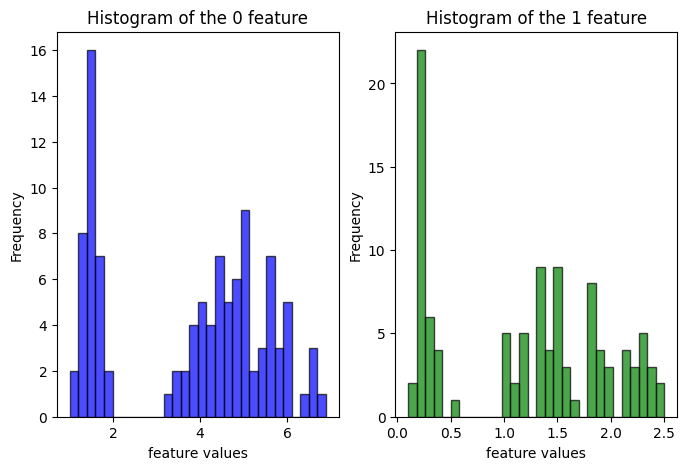

In [11]:
# Plot histograms
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

for i in range(2):
    axes[i].hist(X_train[:, i], bins=30, color=['blue', 'green'][i], edgecolor='black', alpha=0.7)
    axes[i].set_title(f"Histogram of the {i} feature")
    axes[i].set_xlabel("feature values")
    axes[i].set_ylabel("Frequency")


#### Also visualize the distribution of the test data samples (only 45 samples)

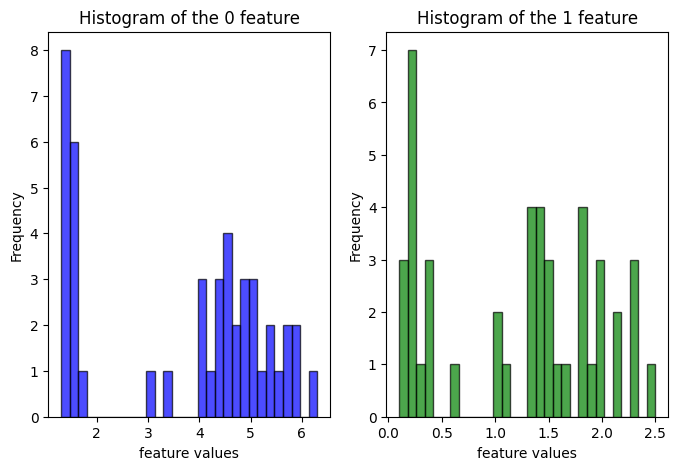

In [12]:
# Plot histograms
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

for i in range(2):
    axes[i].hist(X_test[:, i], bins=30, color=['blue', 'green'][i], edgecolor='black', alpha=0.7)
    axes[i].set_title(f"Histogram of the {i} feature")
    axes[i].set_xlabel("feature values")
    axes[i].set_ylabel("Frequency")

## Feature scaling

In [13]:
# import the StandardScalar class from the preprocessing module
from sklearn.preprocessing import StandardScaler

In [14]:
# initialize a new class object
sc = StandardScaler()

In [15]:
# Use the fit method to estimate the mean and std
sc.fit(X_train)

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [16]:
# use the method transform to standardize the data
# the new data will be centered around 0, with a standard deviation 1
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

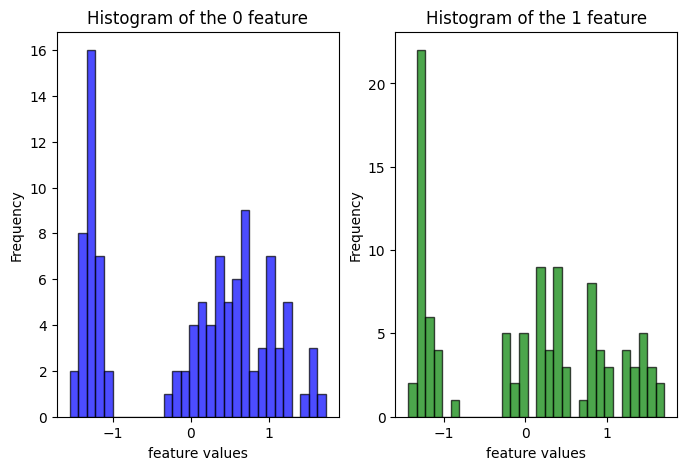

In [17]:
# Plot histograms for the "training" dataset
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

for i in range(2):
    axes[i].hist(X_train_std[:, i], bins=30, color=['blue', 'green'][i], edgecolor='black', alpha=0.7)
    axes[i].set_title(f"Histogram of the {i} feature")
    axes[i].set_xlabel("feature values")
    axes[i].set_ylabel("Frequency")

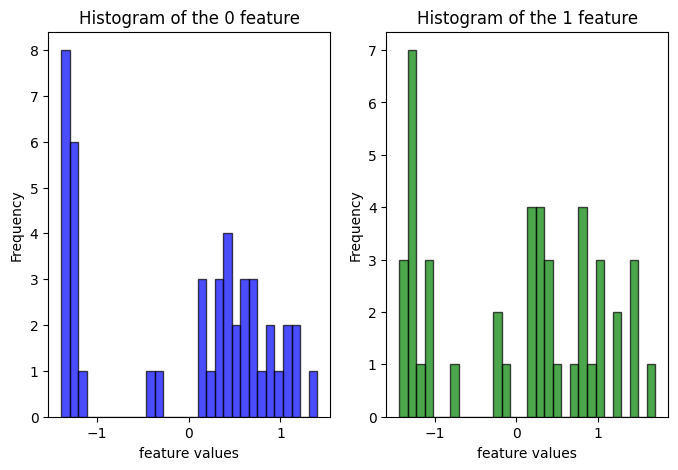

In [18]:
# Plot histograms for the "testing" dataset
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

for i in range(2):
    axes[i].hist(X_test_std[:, i], bins=30, color=['blue', 'green'][i], edgecolor='black', alpha=0.7)
    axes[i].set_title(f"Histogram of the {i} feature")
    axes[i].set_xlabel("feature values")
    axes[i].set_ylabel("Frequency")

## Train the perceptron model and calculate the performance metrics

In [19]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1) # The training data will be shuffled before we train the model
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std) # apply the trained model to make predictions on the test data
print(y_pred)
print(y_test)

[2 0 0 2 1 1 2 1 2 0 0 2 0 1 0 1 2 1 1 2 2 0 1 2 1 1 0 2 0 2 0 0 1 1 2 2 0
 0 0 1 2 2 1 0 0]
[2 0 0 2 1 1 2 1 2 0 0 2 0 1 0 1 2 1 1 2 2 0 1 2 1 1 1 2 0 2 0 0 1 1 2 2 0
 0 0 1 2 2 1 0 0]


In [20]:
print(f"Misclassified examples: {(y_test != y_pred).sum()}")

Misclassified examples: 1


In [21]:
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Accuracy: 0.978


In [22]:
print(f"Accuracy: {ppn.score(X_test_std, y_test):.3f}")

Accuracy: 0.978


## 3D scatter plot of the Iris flower dataset

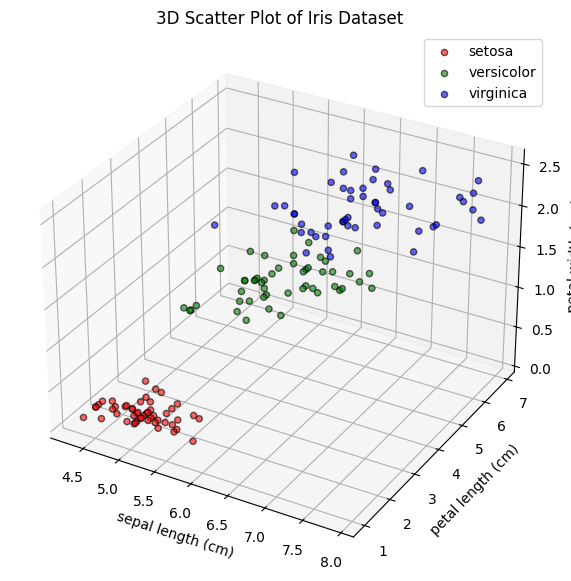

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features (150 samples x 4 features)
y = iris.target  # Target labels (0, 1, 2 for three species)
target_names = iris.target_names  # Species names

# Choose three features (example: Sepal length, Petal length, Petal width)
feature_idx = [0, 2, 3]  # Change indices to select different features
feature_names = [iris.feature_names[i] for i in feature_idx]

# Extract selected feature columns
X_selected = X[:, feature_idx]

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Define colors for the three classes
colors = ['r', 'g', 'b']

for i, target in enumerate(np.unique(y)):  # Loop over species
    ax.scatter(X_selected[y == target, 0], 
               X_selected[y == target, 1], 
               X_selected[y == target, 2], 
               label=target_names[target], 
               color=colors[i], alpha=0.6, edgecolors='k')

# Labels and title
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.set_zlabel(feature_names[2])
ax.set_title("3D Scatter Plot of Iris Dataset")
ax.legend()

plt.show()


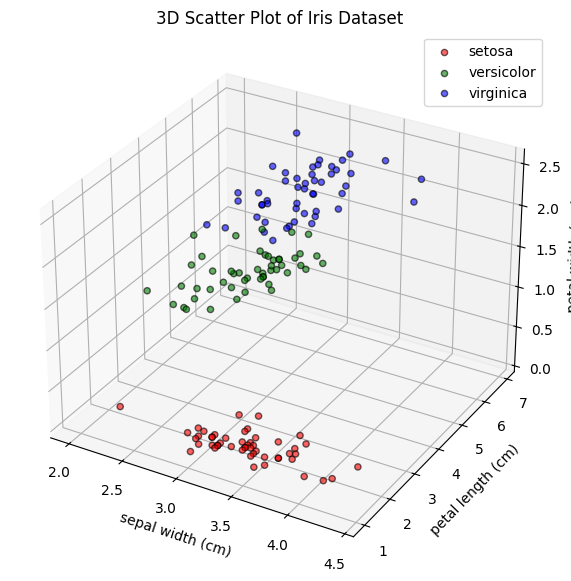

In [24]:
# visualize with different features

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features (150 samples x 4 features)
y = iris.target  # Target labels (0, 1, 2 for three species)
target_names = iris.target_names  # Species names

# Choose three features (example: Sepal length, Petal length, Petal width)
feature_idx = [1, 2, 3]  # Change indices to select different features
feature_names = [iris.feature_names[i] for i in feature_idx]

# Extract selected feature columns
X_selected = X[:, feature_idx]

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Define colors for the three classes
colors = ['r', 'g', 'b']

for i, target in enumerate(np.unique(y)):  # Loop over species
    ax.scatter(X_selected[y == target, 0], 
               X_selected[y == target, 1], 
               X_selected[y == target, 2], 
               label=target_names[target], 
               color=colors[i], alpha=0.6, edgecolors='k')

# Labels and title
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.set_zlabel(feature_names[2])
ax.set_title("3D Scatter Plot of Iris Dataset")
ax.legend()

plt.show()


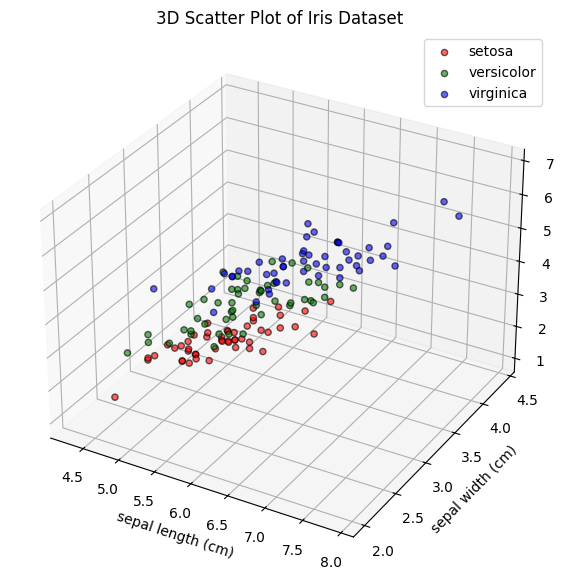

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features (150 samples x 4 features)
y = iris.target  # Target labels (0, 1, 2 for three species)
target_names = iris.target_names  # Species names

# Choose three features (example: Sepal length, Petal length, Petal width)
feature_idx = [0, 1, 2]  # Change indices to select different features
feature_names = [iris.feature_names[i] for i in feature_idx]

# Extract selected feature columns
X_selected = X[:, feature_idx]

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Define colors for the three classes
colors = ['r', 'g', 'b']

for i, target in enumerate(np.unique(y)):  # Loop over species
    ax.scatter(X_selected[y == target, 0], 
               X_selected[y == target, 1], 
               X_selected[y == target, 2], 
               label=target_names[target], 
               color=colors[i], alpha=0.6, edgecolors='k')

# Labels and title
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.set_zlabel(feature_names[2])
ax.set_title("3D Scatter Plot of Iris Dataset")
ax.legend()

plt.show()


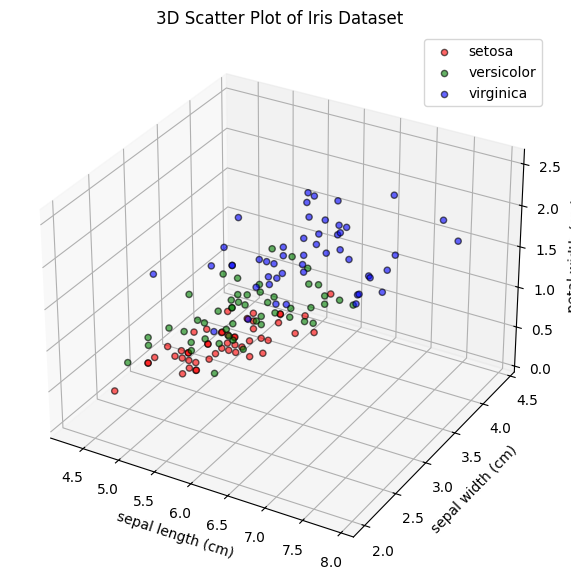

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D


# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features (150 samples x 4 features)
y = iris.target  # Target labels (0, 1, 2 for three species)
target_names = iris.target_names  # Species names

# Choose three features (example: Sepal length, Petal length, Petal width)
feature_idx = [0, 1, 3]  # Change indices to select different features
feature_names = [iris.feature_names[i] for i in feature_idx]

# Extract selected feature columns
X_selected = X[:, feature_idx]

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Define colors for the three classes
colors = ['r', 'g', 'b']

for i, target in enumerate(np.unique(y)):  # Loop over species
    ax.scatter(X_selected[y == target, 0], 
               X_selected[y == target, 1], 
               X_selected[y == target, 2], 
               label=target_names[target], 
               color=colors[i], alpha=0.6, edgecolors='k')

# Labels and title
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.set_zlabel(feature_names[2])
ax.set_title("3D Scatter Plot of Iris Dataset")
ax.legend()

plt.show()


## Plot the boundary lines of our newly trained perceptron model and visualize how well it separates the different flower examples

/opt/anaconda3/envs/env_pytorch/lib/python3.13/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/env_pytorch/lib/python3.13/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/env_pytorch/lib/python3.13/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


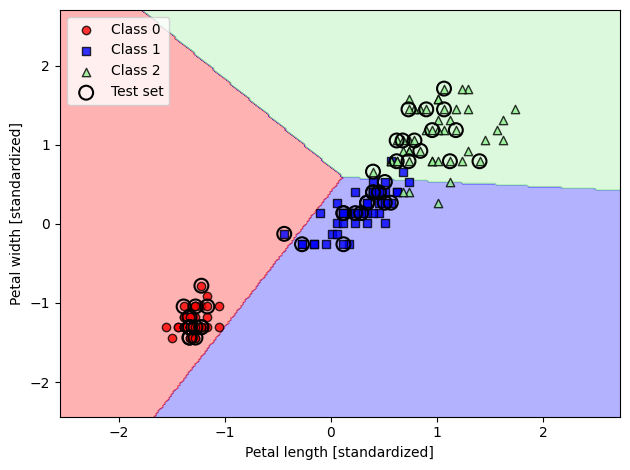

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx, resolution=0.02):
    """
    X : Feature matrix with two selected features.
    y : Target labels
    classifier : object, Trained classifier model
    test_idx : Indices of test samples to highlight.
    resolution : Step size for mesh grid (default: 0.02 for fine granularity).
    """

    # Define marker and color map
    markers = ('o', 's', '^', 'v', '<')  # Different marker shapes for classes
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')  # Colors for classes
    cmap = ListedColormap(colors[:len(np.unique(y))])  # Color map based on unique class labels

    # Define decision boundary grid, visualize the first two features, find their feature ranges [min, max]
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # Expand range for better visualization
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )  # Create a coordinate grid

    # Predict class labels for each point in the grid
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)  # Reshape to match the grid dimensions

    # Plot the decision boundary
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)  # Use contourf for filled decision regions
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):  # Loop through unique classes
        plt.scatter(
            x=X[y == cl, 0], y=X[y == cl, 1], 
            alpha=0.8, c=colors[idx], marker=markers[idx], 
            label=f'Class {cl}', edgecolor='k'
        )

    # Highlight test examples wih circles
    if test_idx is not None:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(
            X_test[:, 0], X_test[:, 1], 
            facecolors='none', edgecolor='black', 
            alpha=1.0, linewidth=1.5, marker='o', 
            s=100, label='Test set'
        )

# Assuming X_train_std, X_test_std, y_train, y_test, and ppn (trained model) exist, as obained in the above cells
X_combined_std = np.vstack((X_train_std, X_test_std))  # Combine training and test set
y_combined = np.hstack((y_train, y_test))  # Combine labels

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
